# Детекция лиц с OpenCV
## Интерактивная демонстрация работы детектора лиц

In [2]:
# Установка необходимых библиотек

In [30]:
# Импорт необходимых библиотек

import pip
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Проверка версии OpenCV
print(f"OpenCV версия: {cv2.__version__}")

OpenCV версия: 4.10.0


In [31]:
# Инициализация детектора лиц
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

if not os.path.exists(cascade_path):
    raise FileNotFoundError(f"Файл каскада не найден: {cascade_path}")

face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    raise ValueError("Не удалось загрузить каскад Хаара")

print("Детектор лиц инициализирован успешно")

Детектор лиц инициализирован успешно


In [32]:
# Загрузка изображения
image_path = "input.jpg"

if not os.path.exists(image_path):
    raise FileNotFoundError(f"Файл изображения не найден: {image_path}")

img = cv2.imread(image_path)
if img is None:
    raise ValueError("Не удалось загрузить изображение")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"Изображение загружено. Размер: {img.shape}")

Изображение загружено. Размер: (433, 640, 3)


In [33]:
# Детекция лиц
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.10500,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE
)

print(f"Найдено {len(faces)} лиц")
faces

Найдено 4 лиц


array([[313, 150,  72,  72],
       [237, 114,  78,  78],
       [527, 152,  76,  76],
       [122, 130,  79,  79]], dtype=int32)

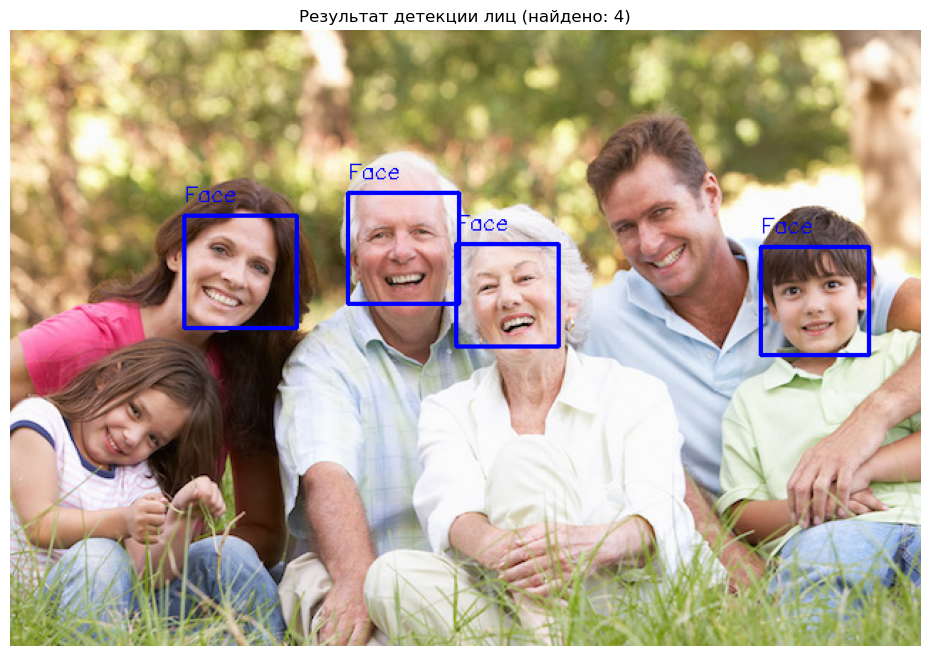

In [35]:
# Визуализация результатов
img_result = img.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(img_result, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img_result, f'Face', (x, y-10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Отображение результата
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.title(f"Результат детекции лиц (найдено: {len(faces)})")
plt.axis('off')
plt.show()

In [8]:
# Сохранение результата
output_path = "output_notebook.jpg"
cv2.imwrite(output_path, img_result)
print(f"Результат сохранен в: {output_path}")

Результат сохранен в: output_notebook.jpg
